In [2]:
import gc
gc.collect()

483

In [ ]:
import polars as pl
pl.Config.set_tbl_rows(1000)  # or whatever number of rows you want to see
import psutil
import os
import gc
from typing import Dict, Optional, Union, List
from pathlib import Path
# If you still have issues, try this alternative version using matplotlib
import matplotlib.pyplot as plt
import numpy as np # type: ignore
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def clear_memory(df_to_remove: Optional[Union[pl.DataFrame, List[pl.DataFrame]]] = None) -> None:
    """
    Clear memory and print memory usage statistics
    """
    try:
        # Print initial state
        print("\nInitial memory state:")
        process = psutil.Process(os.getpid())
        initial_memory_mb = process.memory_info().rss / 1024 / 1024
        print(f"Current Memory Usage: {initial_memory_mb:.2f} MB ({initial_memory_mb/1024:.2f} GB)")
        
        # Remove specific DataFrame if provided
        if df_to_remove is not None:
            if isinstance(df_to_remove, list):
                for df in df_to_remove:
                    # Get the variable name
                    name = [var_name for var_name, var_val in globals().items() if var_val is df]
                    if name:
                        globals().pop(name[0], None)
                    del df
            else:
                name = [var_name for var_name, var_val in globals().items() if var_val is df_to_remove]
                if name:
                    globals().pop(name[0], None)
                del df_to_remove
                
        # Force garbage collection
        gc.collect()
        
        # Get new memory info
        new_memory_mb = process.memory_info().rss / 1024 / 1024
        memory_freed = initial_memory_mb - new_memory_mb
        
        print(f"\nCurrent Memory Usage: {new_memory_mb:.2f} MB ({new_memory_mb/1024:.2f} GB)")
        print(f"Available System Memory: {psutil.virtual_memory().available / 1024 / 1024 / 1024:.2f} GB")
        print(f"Memory Utilization: {psutil.virtual_memory().percent}%")
        
        if memory_freed > 0:
            print(f"Memory freed: {memory_freed:.2f} MB")
            
    except Exception as e:
        print(f"Memory cleanup failed: {e}")

In [5]:
# Third cell - Define load_data function
def load_data(
    file_path: str,
    schema_overrides: Optional[Dict] = None,
    columns_to_drop: Optional[List[str]] = None,
    low_memory: bool = True
) -> Optional[pl.DataFrame]:
    """
    Load and process a CSV file using Polars
    
    Args:
        file_path: Path to the CSV file
        schema_overrides: Dictionary of column names and their data types
        columns_to_drop: List of column names to drop
        low_memory: Whether to use low memory mode
    
    Returns:
        Processed Polars DataFrame or None if error occurs
    """
    try:
        # Ensure file exists
        if not Path(file_path).exists():
            raise FileNotFoundError(f"File not found: {file_path}")
            
        print("Initial memory state:")
        clear_memory()
        
        print("\nLoading CSV file...")
        # Read CSV with provided schema overrides
        df = pl.read_csv(
            file_path,
            schema_overrides=schema_overrides or {},
            low_memory=low_memory
        )
        
        # Drop specified columns if any
        if columns_to_drop:
            df = df.drop(columns_to_drop)
            
        print("\nAfter loading CSV:")
        clear_memory()
        
        return df
        
    except Exception as e:
        print(f"Error in data processing: {e}")
        return None

In [6]:
# Define schema overrides for your specific CSV
schema = {
    'Year': pl.Int32,
    'Month': pl.Int32,
    'Day': pl.Int32,
    'Crop': pl.Utf8,
    'DistrictName': pl.Utf8,
    'QueryType': pl.Utf8,
    'Season': pl.Utf8,
    'Sector': pl.Utf8,
    'StateName': pl.Utf8,
    'QueryText': pl.Utf8,
    'KccAns': pl.Utf8,
    'Category': pl.Utf8,
    'BlockName': pl.Utf8
}

# Specify columns to drop
columns_to_drop = ['BlockName', 'Category']

# Load your data (replace with your actual file path)
master_df = load_data(
    file_path='dataset/original_dataset/kcc_dataset.csv',  # Replace with your actual file path
    schema_overrides=schema,
    columns_to_drop=columns_to_drop,
    low_memory=True
)



Initial memory state:

Initial memory state:
Current Memory Usage: 124.26 MB (0.12 GB)

Current Memory Usage: 124.26 MB (0.12 GB)
Available System Memory: 244.61 GB
Memory Utilization: 2.5%

Loading CSV file...

After loading CSV:

Initial memory state:
Current Memory Usage: 11818.89 MB (11.54 GB)

Current Memory Usage: 11818.89 MB (11.54 GB)
Available System Memory: 233.10 GB
Memory Utilization: 7.1%


In [7]:
master_df.head()

Year,Month,Day,Crop,DistrictName,QueryType,Season,Sector,StateName,QueryText,KccAns
i32,i32,i32,str,str,str,str,str,str,str,str
2006,1,17,"""1275""","""SAGAR""","""99""","""RABI""","""HORTICULTURE""","""MADHYA PRADESH""","""how to control flower drop in …","""spray planofix4mlpump"""
2006,1,17,"""964""","""SAGAR""","""Disease Management""","""RABI""","""ANIMAL HUSBANDRY""","""MADHYA PRADESH""","""how tyo control diseases in bu…",null
2006,1,17,"""1279""","""SAGAR""","""76""","""RABI""","""HORTICULTURE""","""MADHYA PRADESH""","""how to control fruit borer in …","""should be spray profenophos 35…"
2006,1,17,"""1064""","""SAGAR""","""3""","""RABI""","""AGRICULTURE""","""MADHYA PRADESH""","""how to control of yellow moisa…","""should be spray metasystox 35m…"
2006,1,17,"""1279""","""DAMOH""","""76""","""RABI""","""HORTICULTURE""","""MADHYA PRADESH""","""how to control white fly in br…","""should be spray metasystox 35m…"


In [8]:
master_df.shape

(41987874, 11)

##### Filtering: Null analysis and cleaning

In [9]:
def analyze_and_clean_nulls(
    df: pl.DataFrame,
    columns_to_clean: List[str],
    fill_nulls: Dict[str, str] = None
) -> tuple[pl.DataFrame, pl.DataFrame]:
    """
    Analyze null values in a DataFrame and clean them according to specified rules.
    
    Args:
        df: Input Polars DataFrame
        columns_to_clean: List of column names where nulls should be dropped
        fill_nulls: Dictionary of {column_name: fill_value} for replacing nulls
    
    Returns:
        tuple: (cleaned_df, null_analysis_df)
    """
    try:
        # Store original shape for comparison
        total_rows = df.shape[0]
        print(f"Original shape: {df.shape}")
        
        # Create null value analysis DataFrame
        null_analysis = (
            pl.DataFrame({
                'Column': df.columns,
                'Total_Values': total_rows,
                'Null_Count': df.null_count().row(0),
            })
            .with_columns([
                # Calculate null percentage for each column
                (pl.col('Null_Count') / pl.col('Total_Values') * 100)
                .round(2)
                .alias('Null_Percentage')
            ])
            .sort('Null_Percentage', descending=True)  # Sort by percentage descending
        )
        
        print("\nNull value analysis:")
        print(null_analysis)
        
        # Create a copy of the DataFrame for cleaning
        cleaned_df = df.clone()
        
        # Drop nulls from specified columns
        if columns_to_clean:
            cleaned_df = cleaned_df.drop_nulls(subset=columns_to_clean)
            print(f"\nShape after removing nulls: {cleaned_df.shape}")
            
            # Optional: Verify null removal
            null_check = cleaned_df.select(columns_to_clean).null_count()
            print("\nNull counts in specified columns after cleaning:")
            print(null_check)
        
        # Fill nulls in specified columns with provided values
        if fill_nulls:
            for column, fill_value in fill_nulls.items():
                if column in cleaned_df.columns:
                    cleaned_df = cleaned_df.with_columns(
                        pl.col(column).fill_null(value=fill_value)
                    )
                    # Print unique values to verify replacement
                    print(f"\nUnique values in {column} after filling nulls:")
                    print(cleaned_df[column].unique())
                else:
                    print(f"\nWarning: Column '{column}' not found in DataFrame")
        
        return cleaned_df, null_analysis
        
    except Exception as e:
        print(f"Error in analyze_and_clean_nulls: {e}")
        return df, None


In [10]:
# Define columns where nulls should be dropped
columns_to_clean = [
    'KccAns',
    'QueryType',
    'Crop',
    'Sector',
    'QueryText'
]

# Define columns where nulls should be filled with specific values
fill_null_values = {
    'Season': 'Unspecified'
}

# Run the analysis and cleaning
cleaned_df, null_analysis = analyze_and_clean_nulls(
    df=master_df,
    columns_to_clean=columns_to_clean,
    fill_nulls=fill_null_values
)

Original shape: (41987874, 11)

Null value analysis:
shape: (11, 4)
┌──────────────┬──────────────┬────────────┬─────────────────┐
│ Column       ┆ Total_Values ┆ Null_Count ┆ Null_Percentage │
│ ---          ┆ ---          ┆ ---        ┆ ---             │
│ str          ┆ i32          ┆ i64        ┆ f64             │
╞══════════════╪══════════════╪════════════╪═════════════════╡
│ Season       ┆ 41987874     ┆ 26665089   ┆ 63.51           │
│ KccAns       ┆ 41987874     ┆ 4320412    ┆ 10.29           │
│ QueryType    ┆ 41987874     ┆ 1333503    ┆ 3.18            │
│ Crop         ┆ 41987874     ┆ 172930     ┆ 0.41            │
│ Sector       ┆ 41987874     ┆ 85083      ┆ 0.2             │
│ …            ┆ …            ┆ …          ┆ …               │
│ Year         ┆ 41987874     ┆ 0          ┆ 0.0             │
│ Month        ┆ 41987874     ┆ 0          ┆ 0.0             │
│ Day          ┆ 41987874     ┆ 0          ┆ 0.0             │
│ DistrictName ┆ 41987874     ┆ 0          ┆ 0.0  

In [11]:
cleaned_df.shape

(36267631, 11)

In [12]:
# Clear any existing DataFrames
clear_memory(df_to_remove= [master_df, null_analysis])


Initial memory state:
Current Memory Usage: 15623.64 MB (15.26 GB)

Current Memory Usage: 15623.64 MB (15.26 GB)
Available System Memory: 231.11 GB
Memory Utilization: 7.9%


#### Filtering: ONLY `digit` values in columns that are supposed to have texts

In [13]:
def analyze_digit_only_values(
    df: pl.DataFrame,
    columns_to_check: Optional[List[str]] = None,
    remove_digit_only: bool = True
) -> tuple[pl.DataFrame, pl.DataFrame, Dict]:
    """
    Analyze and optionally remove rows containing only digits in specified columns.
    
    Args:
        df: Input Polars DataFrame
        columns_to_check: List of columns to analyze. If None, analyzes all columns
        remove_digit_only: Whether to remove rows with digit-only values
        
    Returns:
        tuple: (cleaned_df, digit_analysis_df, stats_dict)
    """
    try:
        # Initial statistics
        initial_shape = df.shape
        total_rows = initial_shape[0]
        
        # Use provided columns or all columns
        cols_to_analyze = columns_to_check if columns_to_check else df.columns
        
        # Analyze digit-only values for all specified columns
        results = []
        for col in cols_to_analyze:
            # Count values that contain only digits
            digit_only_count = df.filter(
                pl.col(col).cast(pl.Utf8).str.contains(r'^\d+$')
            ).height
            
            # Calculate percentage
            percentage = (digit_only_count / total_rows * 100)
            
            results.append({
                'Column': col,
                'Total_Values': total_rows,
                'Digit_Only_Count': digit_only_count,
                'Percentage': round(percentage, 2)
            })
        
        # Create analysis DataFrame
        digit_analysis = pl.DataFrame(results).sort('Percentage', descending=True)
        
        # Print analysis results
        print("\nPercentage of digit-only values in each column:")
        print(digit_analysis)
        
        # Remove digit-only values if requested
        if remove_digit_only and columns_to_check:
            # Create filter conditions more efficiently
            filter_conditions = [
                ~pl.col(col).cast(pl.Utf8).str.contains(r'^\d+$')
                for col in columns_to_check
            ]
            
            # Combine all conditions using reduce
            from functools import reduce
            import operator
            
            final_condition = reduce(operator.and_, filter_conditions)
            
            # Apply filter
            cleaned_df = df.filter(final_condition)
            
            # Calculate statistics
            final_shape = cleaned_df.shape
            rows_removed = initial_shape[0] - final_shape[0]
            
            # Create stats dictionary
            stats = {
                'initial_rows': initial_shape[0],
                'final_rows': final_shape[0],
                'rows_removed': rows_removed,
                'removal_percentage': round((rows_removed / initial_shape[0]) * 100, 2)
            }
            
            # Print statistics
            print(f"\nRows removed: {rows_removed:,} ({stats['removal_percentage']}%)")
            print(f"Final shape: {final_shape}")
            
            # Verify removal (optional)
            verification = []
            for col in columns_to_check:
                digit_only_count = cleaned_df.filter(
                    pl.col(col).cast(pl.Utf8).str.contains(r'^\d+$')
                ).height
                verification.append({
                    'Column': col,
                    'Digit_Only_Count': digit_only_count,
                    'Percentage': round((digit_only_count / final_shape[0]) * 100, 2)
                })
            
            verification_df = pl.DataFrame(verification)
            stats['verification'] = verification_df
            
        else:
            cleaned_df = df
            stats = {'message': 'No cleaning performed'}
        
        return cleaned_df, digit_analysis, stats
        
    except Exception as e:
        print(f"Error in analyze_digit_only_values: {e}")
        return df, None, {'error': str(e)}

In [14]:
columns_to_check = [
    'QueryType',
    'Crop',
    'Season',
    'Sector',
    'KccAns',
    'QueryText'
]

# Run analysis and cleaning
more_appropriate_df, analysis_df, stats = analyze_digit_only_values(
    df=cleaned_df,
    columns_to_check=columns_to_check,
    remove_digit_only=True
)




Percentage of digit-only values in each column:
shape: (6, 4)
┌───────────┬──────────────┬──────────────────┬────────────┐
│ Column    ┆ Total_Values ┆ Digit_Only_Count ┆ Percentage │
│ ---       ┆ ---          ┆ ---              ┆ ---        │
│ str       ┆ i64          ┆ i64              ┆ f64        │
╞═══════════╪══════════════╪══════════════════╪════════════╡
│ QueryType ┆ 36267631     ┆ 2785401          ┆ 7.68       │
│ Crop      ┆ 36267631     ┆ 1433408          ┆ 3.95       │
│ Season    ┆ 36267631     ┆ 535174           ┆ 1.48       │
│ Sector    ┆ 36267631     ┆ 298539           ┆ 0.82       │
│ KccAns    ┆ 36267631     ┆ 41759            ┆ 0.12       │
│ QueryText ┆ 36267631     ┆ 2229             ┆ 0.01       │
└───────────┴──────────────┴──────────────────┴────────────┘

Rows removed: 3,542,777 (9.77%)
Final shape: (32724854, 11)


In [15]:
more_appropriate_df.shape

(32724854, 11)

In [16]:
analysis_df

Column,Total_Values,Digit_Only_Count,Percentage
str,i64,i64,f64
"""QueryType""",36267631,2785401,7.68
"""Crop""",36267631,1433408,3.95
"""Season""",36267631,535174,1.48
"""Sector""",36267631,298539,0.82
"""KccAns""",36267631,41759,0.12
"""QueryText""",36267631,2229,0.01


In [17]:
final_df = more_appropriate_df.with_columns([
    pl.concat_str([
        pl.col('Day').cast(pl.Utf8).str.zfill(2),
        pl.col('Month').cast(pl.Utf8).str.zfill(2),
        pl.col('Year').cast(pl.Utf8)
    ], separator='-')
    .str.strptime(pl.Datetime, format='%d-%m-%Y')
    .alias('Date')
])

In [18]:
clear_memory(
    df_to_remove= ["analysis_df",	 
                   "cleaned_df",
                   "more_appropriate_df"
])


Initial memory state:
Current Memory Usage: 17555.45 MB (17.14 GB)

Current Memory Usage: 17555.45 MB (17.14 GB)
Available System Memory: 234.40 GB
Memory Utilization: 6.6%


In [19]:
final_df.head()

Year,Month,Day,Crop,DistrictName,QueryType,Season,Sector,StateName,QueryText,KccAns,Date
i32,i32,i32,str,str,str,str,str,str,str,str,datetime[μs]
2006,1,17,"""BovineCowBuffalo""","""INDORE""","""Dairy Production""","""RABI""","""ANIMAL HUSBANDRY""","""MADHYA PRADESH""","""How to increase milk productio…","""you can give gylox powder 100 …",2006-01-17 00:00:00
2007,1,5,"""Coconut""","""SAMASTIPUR""","""Fertilizer Use and Availabilit…","""KHARIF""","""HORTICULTURE""","""BIHAR""","""FERTILIZER DOSES OF COCONUT""","""FERTILIZER ARE NPK 1:2:2 KGPL…",2007-01-05 00:00:00
2007,1,5,"""Others""","""KHAGARIA""","""Weather""","""KHARIF""","""AGRICULTURE""","""BIHAR""","""WEATHER CONDATION IN KHAGARIA""","""ANSWER GIVEN TO DETAIL """,2007-01-05 00:00:00
2007,1,20,"""Others""","""KATIHAR""","""Weather""","""Unspecified""","""HORTICULTURE""","""BIHAR""","""Weather condition of Katihar d…","""Answer given to farmer by Inte…",2007-01-20 00:00:00
2007,1,1,"""Onion""","""AHMADNAGAR""","""Agriculture Mechanization""","""Unspecified""","""HORTICULTURE""","""MAHARASHTRA""","""blight on onion""","""copper oxycloride25ml10lit of …",2007-01-01 00:00:00


In [20]:
final_df.write_csv(
    "dataset/processed_dataset/India_level_cleaned_data.csv",
    separator=",",           # Default is comma
    include_header=True,        # Include column names
    quote_char='"',         # Quote character for strings
    date_format="%Y-%m-%d", # Format for date columns
    float_precision=3       # Number of decimal places for floats
)

In [199]:
def create_distribution_chart(
    df: pl.DataFrame,
    column: str,
    top_n: int = 15,
    title: str = None,
    figsize: tuple = (14, 10),
    colors: list = None,
    font_sizes: dict = None,
    donut_width: float = 0.6,
    show_others: bool = True,
    percentage_precision: int = 1
):
    """
    Create a donut chart with flexible configuration options.
    
    Parameters:
    -----------
    df : pl.DataFrame
        Input DataFrame
    column : str
        Column name to analyze distribution
    top_n : int, optional
        Number of top categories to show (default: 15)
    title : str, optional
        Chart title (default: auto-generated based on column name)
    figsize : tuple, optional
        Figure size as (width, height) (default: (14, 10))
    colors : list, optional
        List of colors for the chart (default: predefined pastel colors)
    font_sizes : dict, optional
        Dictionary with font size configurations
    donut_width : float, optional
        Width of the donut (0 to 1) (default: 0.6)
    show_others : bool, optional
        Whether to group remaining categories as 'Others' (default: True)
    percentage_precision : int, optional
        Number of decimal places for percentage labels (default: 1)
    """
    try:
        import matplotlib.pyplot as plt
        
        # Validate inputs
        if column not in df.columns:
            raise ValueError(f"Column '{column}' not found in DataFrame")
            
        # Set default font sizes if not provided
        default_font_sizes = {
            'title': 20,
            'category_labels': 12,
            'percentage_labels': 9
        }
        font_sizes = font_sizes or default_font_sizes
        
        # Set default colors if not provided
        default_colors = [
            '#FFB3BA',  # pastel pink
            '#BAFFC9',  # pastel green
            '#BAE1FF',  # pastel blue
            '#FFFFBA',  # pastel yellow
            '#FFB3FF',  # pastel purple
            '#FFE4B5',  # pastel orange
            '#E6E6FA',  # pastel lavender
            '#98FB98',  # pale green
            '#DDA0DD',  # plum
            '#F0E68C',  # khaki
            '#B0E0E6',  # powder blue
            '#FFC0CB',  # pink
            '#98FF98',  # mint
            '#87CEEB',  # sky blue
            '#DDA0DD'   # plum
        ]
        colors = colors or default_colors
        
        # Calculate distribution
        distribution = (df
            .select(pl.col(column))
            .group_by(column)
            .agg(pl.count(column).alias('count'))
            .with_columns([
                (pl.col('count') / pl.col('count').sum() * 100)
                .round(2)
                .alias('percentage')
            ])
            .sort('count', descending=True)
        )
        
        # Get top categories and others
        top_categories = distribution.head(top_n)
        
        if show_others and len(distribution) > top_n:
            others_percentage = distribution.slice(top_n).select('percentage').sum().item()
            labels = list(top_categories.get_column(column)) + ['Others']
            values = list(top_categories.get_column('percentage')) + [others_percentage]
        else:
            labels = list(top_categories.get_column(column))
            values = list(top_categories.get_column('percentage'))
        
        # Set up the plot
        plt.figure(figsize=figsize, facecolor='white')
        
        # Create pie chart
        patches, texts, autotexts = plt.pie(
            values,
            labels=labels,
            autopct=f'%{percentage_precision}.{percentage_precision}f%%',
            pctdistance=0.85,
            wedgeprops=dict(
                width=donut_width,
                edgecolor='white',
                linewidth=2
            ),
            colors=colors[:len(values)],
            textprops={'fontsize': font_sizes['category_labels'], 
                      'fontweight': 'regular'}
        )
        
        # Customize percentage labels
        plt.setp(autotexts, 
                size=font_sizes['percentage_labels'], 
                weight="regular", 
                color='black')
        
        # Customize category labels
        plt.setp(texts, 
                size=font_sizes['category_labels'], 
                color='black')
        
        # Set title
        if title is None:
            title = f'Distribution of {column}'
        plt.title(title,
                 pad=20,
                 fontsize=font_sizes['title'],
                 fontweight='bold',
                 color='black')
        
        # Set background color
        plt.gca().set_facecolor('white')
        
        # Adjust layout
        plt.tight_layout()

        plt.savefig('plots_folder/plot_1.png')
        
        # Show plot
        plt.show()
        
    except Exception as e:
        print(f"Error creating chart: {e}")
        import traceback
        print(traceback.format_exc())



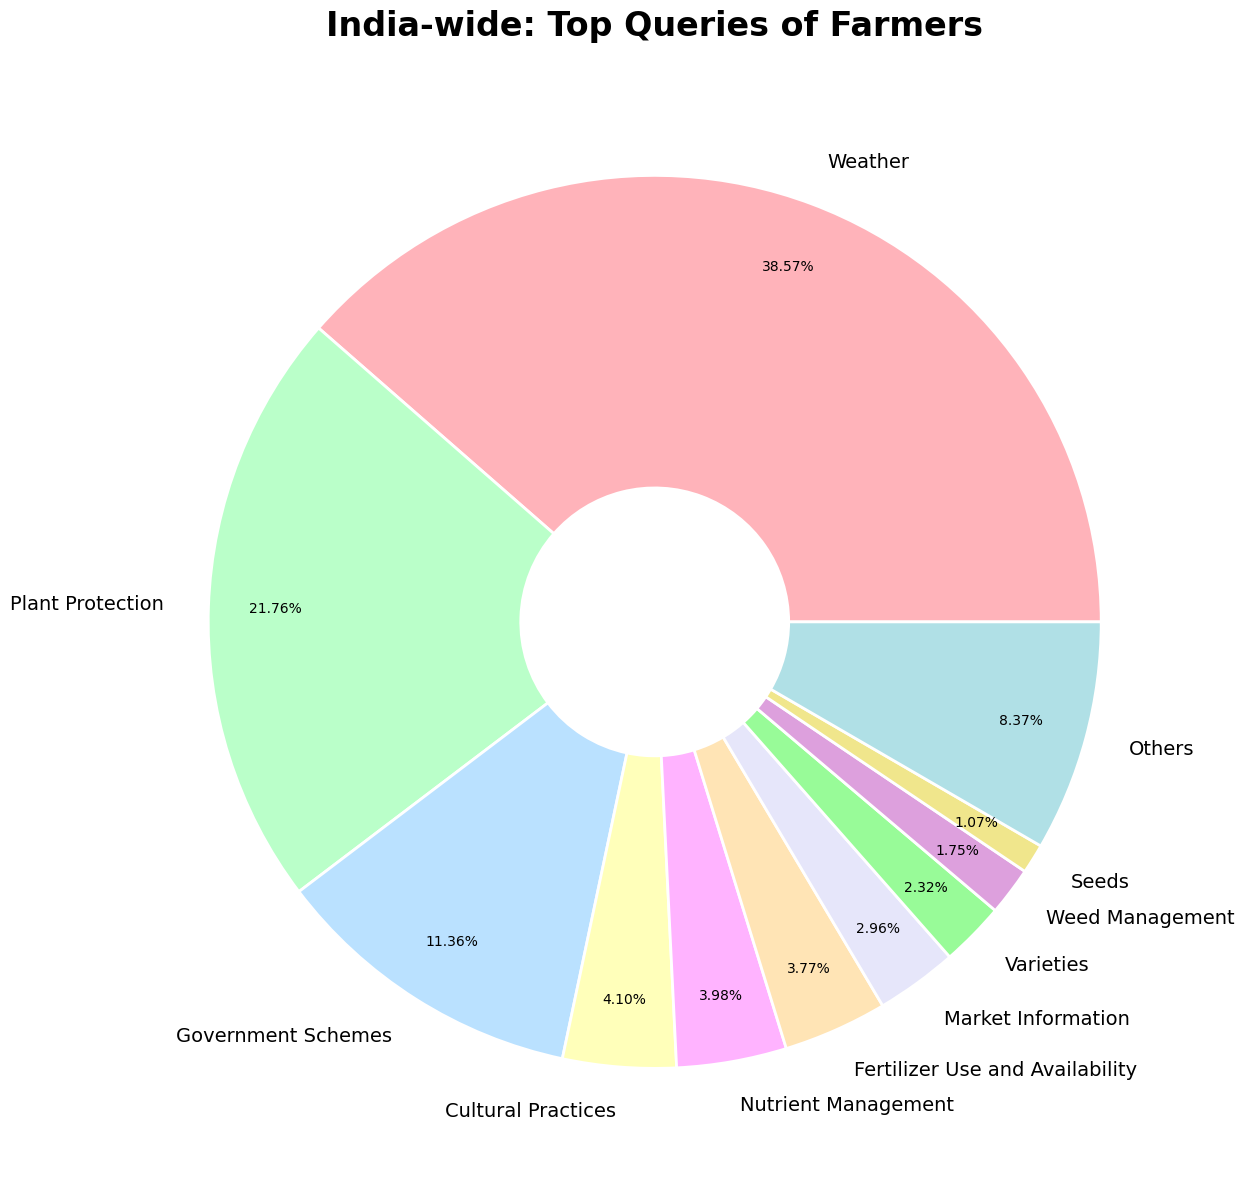

In [200]:
# Example usage:
# Basic usage:
# create_distribution_chart(final_df, column='QueryType')

# Advanced usage:
create_distribution_chart(
    df=final_df,
    column='QueryType',
    top_n=10,
    title='India-wide: Top Queries of Farmers',
    figsize=(16, 12),
    # colors=['#FFB3BA', '#BAFFC9', '#BAE1FF'],
    font_sizes={
        'title': 24,
        'category_labels': 14,
        'percentage_labels': 10
    },
    donut_width=0.7,
    show_others=True,
    percentage_precision=2
)

In [201]:
distribution = (final_df
        .select(pl.col("Crop"))
        .group_by("Crop")
        .agg(pl.count("Crop").alias('count'))
        .with_columns([
            (pl.col('count') / pl.col('count').sum() * 100)
            .round(2)
            .alias('percentage')
        ])
        .sort('count', descending=True)
    )

top_categories = distribution.head(11)

# Create a mapping for long names to shorter versions
name_mapping = {
    'Groundnut pea nutmung phalli': 'Groundnut',
    'Bengal Gram GramChick PeaKabuliChana': 'Bengal Gram'
}

# Create a copy and update the names
updated_categories = top_categories.clone()

# Replace the long names with shorter versions
for old_name, new_name in name_mapping.items():
    updated_categories = updated_categories.with_columns(
        pl.col("Crop").replace(old_name, new_name)
    )

print(updated_categories)



shape: (11, 3)
┌──────────────────────┬──────────┬────────────┐
│ Crop                 ┆ count    ┆ percentage │
│ ---                  ┆ ---      ┆ ---        │
│ str                  ┆ u32      ┆ f64        │
╞══════════════════════╪══════════╪════════════╡
│ Others               ┆ 15109575 ┆ 46.17      │
│ Paddy Dhan           ┆ 2988764  ┆ 9.13       │
│ Wheat                ┆ 2204481  ┆ 6.74       │
│ Cotton Kapas         ┆ 1071478  ┆ 3.27       │
│ Chillies             ┆ 532826   ┆ 1.63       │
│ Onion                ┆ 505276   ┆ 1.54       │
│ Groundnut            ┆ 453477   ┆ 1.39       │
│ Sugarcane Noble Cane ┆ 447507   ┆ 1.37       │
│ Mustard              ┆ 440188   ┆ 1.35       │
│ Brinjal              ┆ 430788   ┆ 1.32       │
│ Bengal Gram          ┆ 429820   ┆ 1.31       │
└──────────────────────┴──────────┴────────────┘


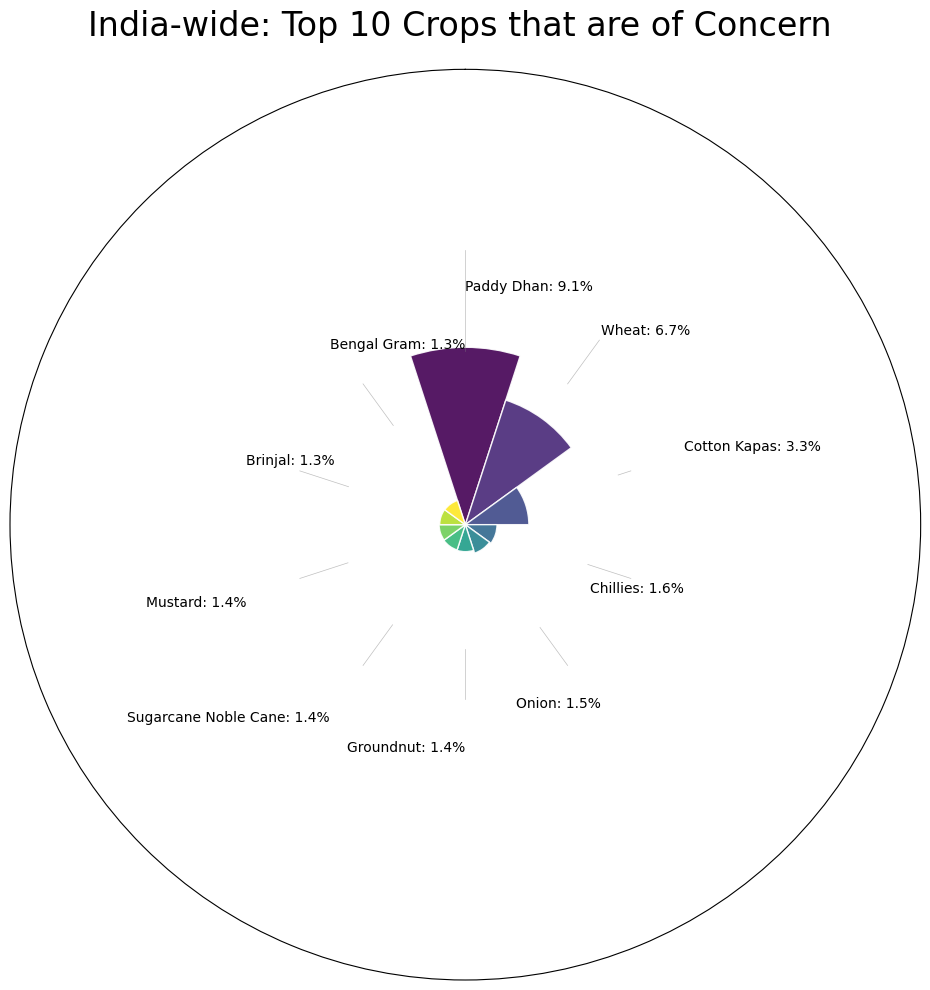

In [203]:
def create_spectrum_radial_chart(data, exclude_first=True, figsize=(12, 12)):
    """
    Create a radial bar chart with regulated text label angles.
    """
    try:
        
        
        # Convert to pandas if needed and exclude 'Others' if specified
        if not isinstance(data, pd.DataFrame):
            data = data.to_pandas()
            
        if exclude_first:
            data = data.iloc[1:]
            
        # Create spectrum colormap
        n_colors = len(data)
        colors = plt.cm.viridis(np.linspace(0, 1, n_colors))
        
        # Create figure
        fig = plt.figure(figsize=figsize, facecolor='white')
        ax = fig.add_subplot(111, projection='polar')
        
        # Calculate angles
        angles = np.linspace(0, 2*np.pi, len(data)+1)
        width = 2*np.pi / len(data)
        
        # Create bars
        bars = ax.bar(
            angles[:-1],
            data['percentage'],
            width=width,
            bottom=20,  # Inner radius
            color=colors,
            alpha=0.9,
            edgecolor='white',
            linewidth=1
        )
        
        def get_text_angle_and_alignment(angle):
            """Calculate text angle and alignment based on position."""
            # Convert to degrees for easier handling
            deg_angle = np.rad2deg(angle) % 360
            
            # Right side of circle
            if deg_angle <= 90 or deg_angle >= 270:
                text_angle = 0  # Horizontal text
                ha = 'left'
                if deg_angle <= 90:
                    va = 'bottom'
                else:
                    va = 'top'
            # Left side of circle
            else:
                text_angle = 360  # Horizontal text but flipped
                ha = 'right'
                if 90 < deg_angle <= 180:
                    va = 'bottom'
                else:
                    va = 'top'
            
            return text_angle, ha, va
        
        # Add labels with connecting lines
        for angle, value, crop in zip(angles[:-1], data['percentage'], data['Crop']):
            # Calculate end point of bar
            bar_end = value + 25  # Add the bottom value
            
            # Calculate label position
            text_radius = max(data['percentage']) + 15  # Use maximum value for consistent alignment
            
            # Get text angle and alignment
            text_angle, ha, va = get_text_angle_and_alignment(angle)
            
            # Calculate positions for the connecting line
            bar_end_x = np.cos(angle) * bar_end
            bar_end_y = np.sin(angle) * bar_end
            
            # Add connecting line with bend
            line_radius = text_radius * 1.2
            ax.plot([angle, angle], [bar_end, line_radius], 
                   color='gray', linewidth=0.5, alpha=0.5)
            
            # Position for text
            text_x = np.cos(angle) * (line_radius * 1.1)
            text_y = np.sin(angle) * (line_radius * 1.1)
            
            # Convert to display coordinates
            display_x = text_x
            display_y = text_y
            
            # Add text with regulated angle
            ax.text(angle, line_radius * 1.1,
                   f'{crop}: {value:.1f}%',
                   ha=ha, 
                   va=va,
                   rotation=text_angle,
                   rotation_mode='anchor')
        
        # Customize the plot
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)
        
        # Remove radial labels and axis lines
        ax.set_rticks([])
        ax.set_xticks([])
        ax.grid(False)
        
        # Set limits to accommodate labels
        ax.set_rmax(text_radius * 1.8)
        
        plt.title('India-wide: Top 10 Crops that are of Concern ', pad=24, fontsize=24)
        plt.tight_layout()
        plt.savefig('plots_folder/plot_2.png')
        plt.show()
        
    except Exception as e:
        print(f"Error creating radial bar chart: {e}")
        import traceback
        print(traceback.format_exc())

# Create the chart
create_spectrum_radial_chart(
    updated_categories,
    exclude_first=True,
    figsize=(10, 10)
)

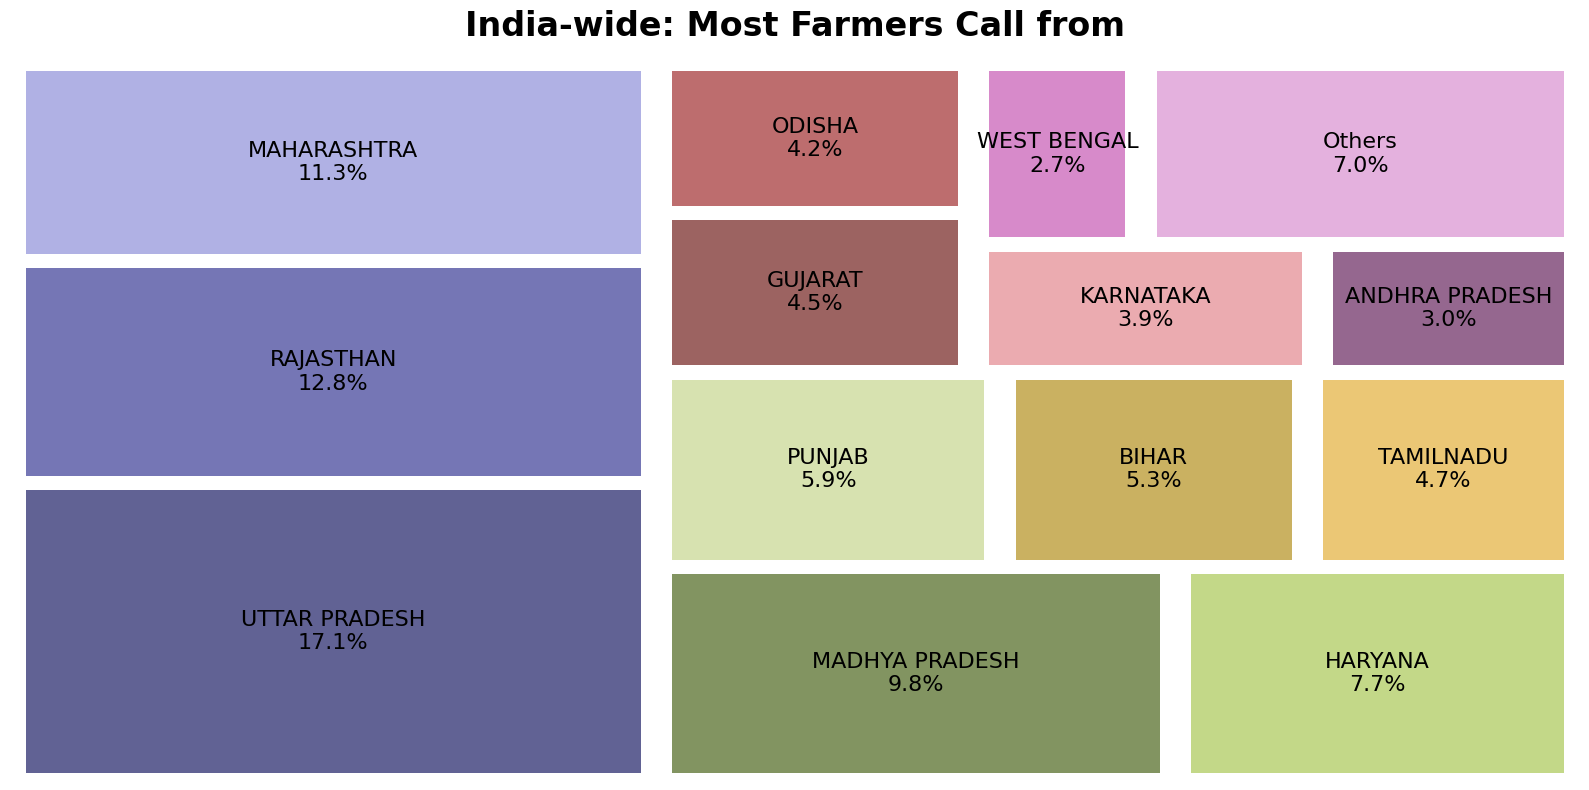

In [204]:
def create_state_treemap(df: pl.DataFrame, threshold_pct: float = 1.0):

    # Calculate state-wise distribution
    distribution = (df
        .select(pl.col('StateName'))
        .group_by('StateName')
        .agg(pl.len().alias('count'))
        .sort('count', descending=True)
    )
    
    # Calculate percentages
    total = distribution['count'].sum()
    distribution = distribution.with_columns([
        (pl.col('count') / total * 100).alias('percentage')
    ])
    
    # Round the percentage column
    distribution = distribution.with_columns([
        pl.col('percentage').round(1)
    ])
    
    # Separate states into main states and others
    main_states = distribution.filter(pl.col('percentage') >= threshold_pct)
    other_states = distribution.filter(pl.col('percentage') < threshold_pct)
    
    # Calculate others total
    others_total = other_states['count'].sum()
    others_percentage = round((others_total / total * 100), 1)
    
    # Add others to main states if there are any states below threshold
    if len(other_states) > 0:
        # Create others row with same schema as main_states
        others_row = pl.DataFrame({
            'StateName': ['Others'],
            'count': pl.Series([others_total], dtype=pl.UInt32),  # Explicitly set UInt32 type
            'percentage': [others_percentage]
        })
        main_states = pl.concat([main_states, others_row])
    
    # Prepare data for plotting
    values = main_states['count'].to_list()
    states = main_states['StateName'].to_list()
    percentages = main_states['percentage'].to_list()
    
    # Create labels
    labels = [f"{state}\n{pct}%" 
             for state, count, pct in zip(states, values, percentages)]
    
    # Create figure
    plt.figure(figsize=(16, 8))
    
    # Define colors
    colors = plt.cm.tab20b(np.linspace(0, 1, len(values)))
    
    # Create treemap
    squarify.plot(
        sizes=values,
        label=labels,
        color=colors,
        alpha=0.8,
        text_kwargs={
            'fontsize': 16,
            'fontweight': 'regular',
            'color':'black'
        },
        pad=True
    )
    
    # Customize the plot
    plt.axis('off')
    plt.title('India-wide: Most Farmers Call from', 
                pad=20,
                fontsize=24,
                fontweight='bold',
                color='black')

    
    plt.tight_layout()
    plt.savefig("plots_folder/plot_3.png")
    plt.show()

# Create the treemap with 1% threshold
create_state_treemap(final_df, threshold_pct=2.5)

/tmp/ipykernel_22452/2791097496.py:25: DeprecationWarning:

`GroupBy.count` is deprecated. It has been renamed to `len`.

/tmp/ipykernel_22452/2791097496.py:36: DeprecationWarning:

`GroupBy.count` is deprecated. It has been renamed to `len`.

/tmp/ipykernel_22452/2791097496.py:37: DeprecationWarning:

The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.



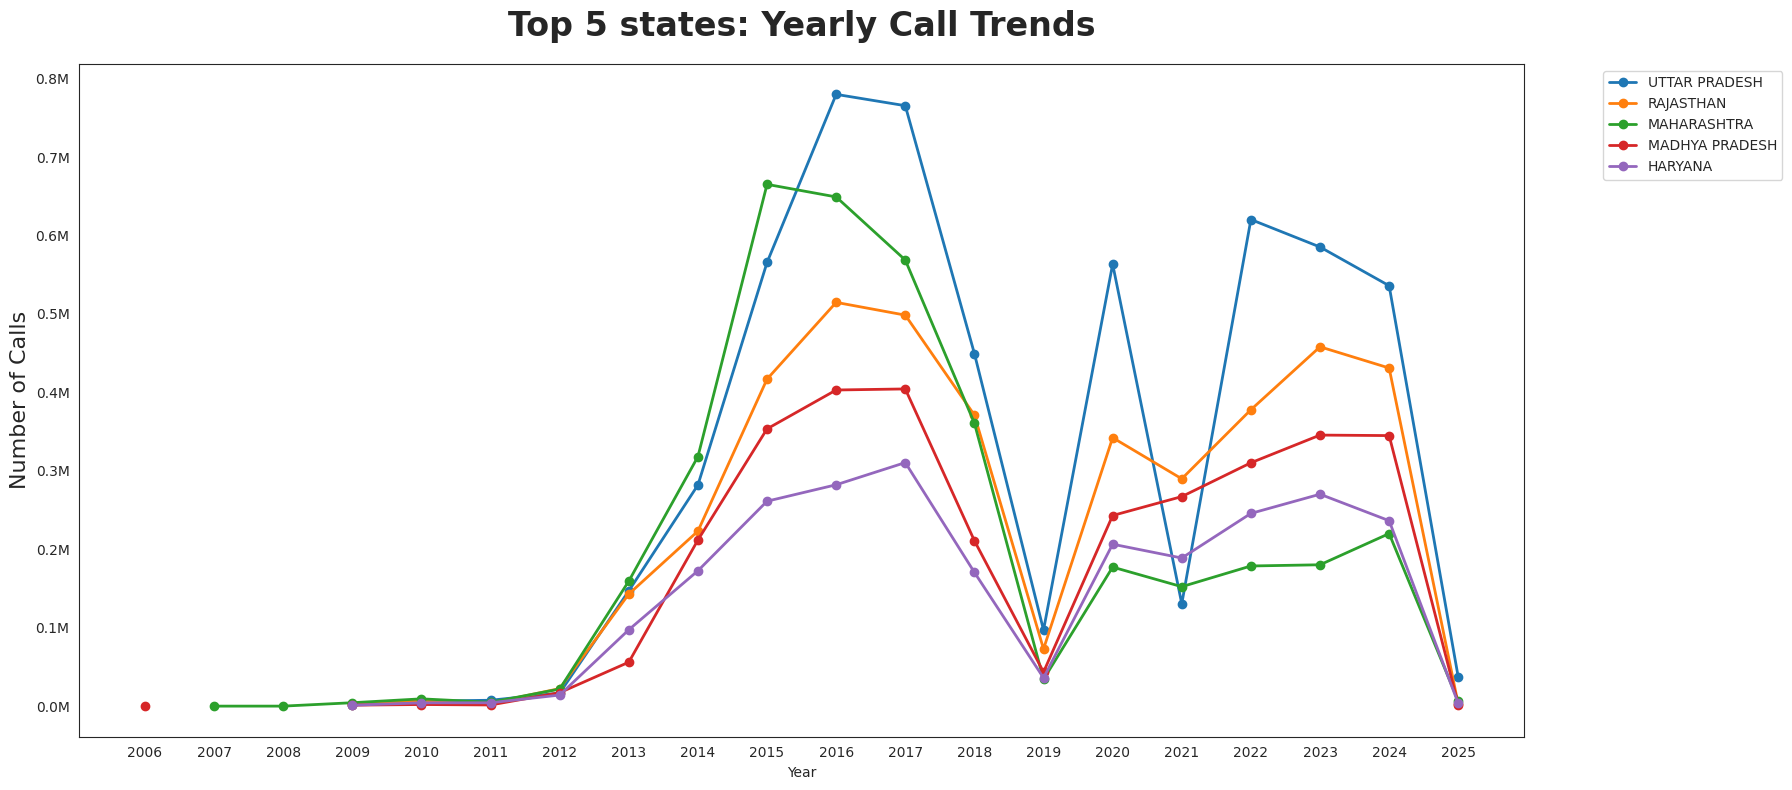

In [226]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_state_trends(df, n_states=5):
    """
    Analyze and visualize yearly call trends for top N states.
    
    Parameters:
    -----------
    df : polars.DataFrame
        Input dataframe with columns: Year, StateName
    n_states : int, optional (default=10)
        Number of top states to analyze
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The generated plot figure
    yearly_counts : polars.DataFrame
        Processed data for top states
    """
    # Get top N states by count
    top_states = (df.group_by('StateName')
                   .count()
                   .sort('count', descending=True)
                   .head(n_states)
                   .get_column('StateName')
                   .to_list())
    
    # Filter for top states
    df_filtered = df.filter(pl.col('StateName').is_in(top_states))
    
    # Get yearly counts for each state
    yearly_counts = (df_filtered.group_by(['Year', 'StateName'])
                               .count()
                               .pivot(
                                   values='count',
                                   index='Year',
                                   columns='StateName'
                               )
                               .sort('Year'))
    
    # Create the visualization
    plt.figure(figsize=(18, 8))
    sns.set_style("white")  # Clean style without gridlines

    # Plot lines for each state
    for state in top_states:
        plt.plot(yearly_counts.get_column('Year'),
                yearly_counts.get_column(state),
                marker='o',
                linewidth=2,
                label=state)

    # Customize the plot
    plt.title(f'Top {n_states} states: Yearly Call Trends', pad=20, fontsize = 24, fontweight = 'bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Calls', fontsize = 16, fontweight = 'regular')
    plt.xticks(yearly_counts.get_column('Year'))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # Format y-axis to use M notation
    def format_func(x, p):
        return f'{x/1000000:.1f}M'
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    plt.savefig('plots_folder/plot_4.png')
    plt.tight_layout()
        
    return plt.gcf(), yearly_counts

# Example usage:
fig, data = analyze_state_trends(final_df)
plt.show()

In [248]:
# First get the top 10 states using len()
top_states = (final_df.group_by('StateName')
              .len()
              .sort('len', descending=True)
              .head(10)
              .get_column('StateName')
              .to_list())

# Filter for top states, AGRICULTURE sector, and insurance-related queries
insurance_df = (final_df
              .filter(pl.col('StateName').is_in(top_states))
              .filter(pl.col('Sector') == 'AGRICULTURE')
              .filter(pl.col('QueryType').str.to_lowercase().str.contains('insurance')))

/tmp/ipykernel_22452/3515048343.py:21: DeprecationWarning:

The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.



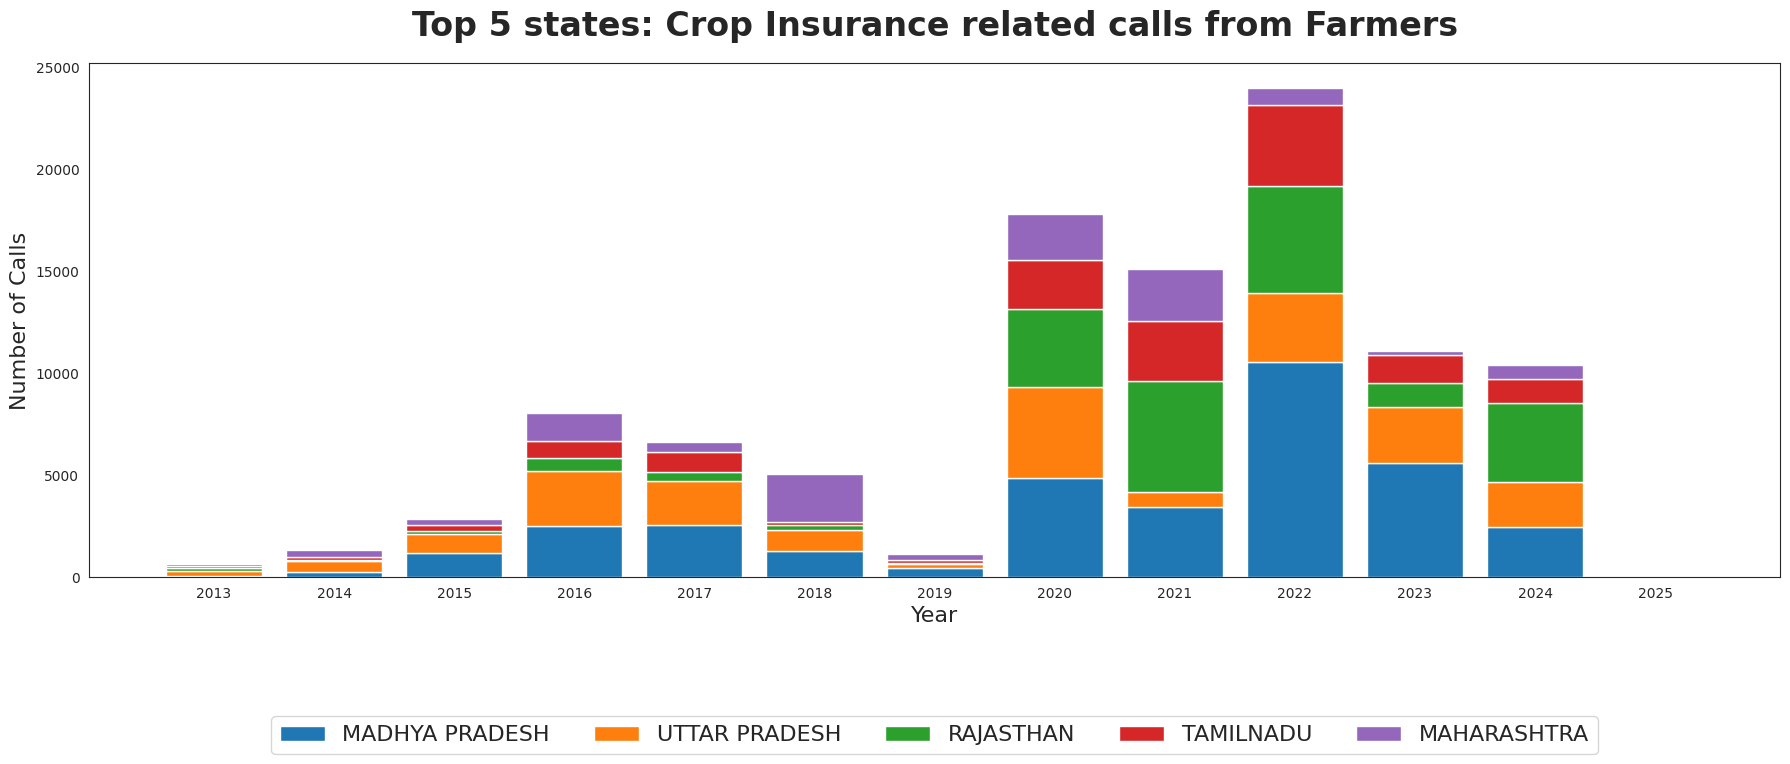

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_state_trends(df, n_states=5):
    # Get top N states by count
    top_states = (df.group_by('StateName')
                   .len()
                   .sort('len', descending=True)
                   .head(n_states)
                   .get_column('StateName')
                   .to_list())
    
    # Define dark pastel colors
    colors = [
        '#7B8FA1',  # dark pastel blue-gray
        '#A4907C',  # dark pastel brown
        '#917FB3',  # dark pastel purple
        '#749F82',  # dark pastel green
        '#A84448',  # dark pastel red
    ]
    
    # Filter for top states
    df_filtered = df.filter(pl.col('StateName').is_in(top_states))
    
    # Get yearly counts for each state
    yearly_counts = (df_filtered.group_by(['Year', 'StateName'])
                               .len()
                               .pivot(
                                   values='len',
                                   index='Year',
                                   columns='StateName'
                               )
                               .sort('Year'))
    
    # Create the visualization
    plt.figure(figsize=(18, 8))
    sns.set_style("white")
    
    # Get years and data for plotting
    years = yearly_counts.get_column('Year').to_numpy()  # Convert to numpy
    bottom = np.zeros(len(years))
    
    # Create stacked bars
    # for state in top_states:
    #     values = yearly_counts.get_column(state).to_numpy()  # Convert to numpy
    #     plt.bar(years, values, bottom=bottom, label=state)
    #     bottom = bottom + values  # Changed from += to +

    for i, state in enumerate(top_states):
        values = yearly_counts.get_column(state).to_numpy()
        plt.bar(years, values, bottom=bottom, label=state, color=colors[i])
        bottom = bottom + values
    
    # Customize the plot
    plt.title(f'Top {n_states} states: Crop Insurance related calls from Farmers', pad=20, fontsize=24, fontweight='bold')
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Number of Calls', fontsize=16, fontweight='regular')
    plt.xticks(years)
    plt.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=len(top_states), fontsize=16)
    
    # Format y-axis to use M notation
    # def format_func(x, p):
    #     return f'{x/1000000:.1f}M'
    # plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    plt.savefig('plots_folder/plot_5.png', 
                bbox_inches='tight'
                )
    plt.tight_layout()
    
    return plt.gcf(), yearly_counts

# Example usage:
fig, data = analyze_state_trends(insurance_df)
plt.show()

In [247]:
# distribution = (final_df
#         .select(pl.col("DistrictName"))
#         .group_by("DistrictName")
#         .agg(pl.count("DistrictName").alias('count'))
#         .with_columns([
#             (pl.col('count') / pl.col('count').sum() * 100)
#             .round(2)
#             .alias('percentage')
#         ])
#         .sort('count', descending=True)
#     )

# top_categories = distribution.head(16)

# print(top_categories)

# # # Create a mapping for long names to shorter versions
# # name_mapping = {
# #     'Groundnut pea nutmung phalli': 'Groundnut',
# #     'Bengal Gram GramChick PeaKabuliChana': 'Bengal Gram'
# # }

# # # Create a copy and update the names
# # updated_categories = top_categories.clone()

# # # Replace the long names with shorter versions
# # for old_name, new_name in name_mapping.items():

# #     updated_categories = updated_categories.with_columns(
# #         pl.col("Crop").replace(old_name, new_name)
# #     )

# # print(updated_categories)